### PREVISÃO DO SCORE DE CRÉDITO COM REGRESSÃO LINEAR
### Vamos criar um modelo de machine learning para prever o score de crédito do cliente
<p> Um resumo do que veremos aqui:<br>
    - Analise Exploratória e Gráficos<br>
    - Tratamento de dados missing <br>
    - Tratamento de outliers <br>
    - OneHotEncoding <br>
    - Engenharia de Atributos <br>
    - Tratamento de dados <br>
    - Normalização de dados <br>
    - Criação, teste e validação de um modelo de machine learning
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
from sklearn.model_selection import train_test_split # Utilizado para separar dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
  
#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importação dos dados, Analise Exploratória e Tratamento de Dados

In [2]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
df_dados = pd.read_excel("dados_credito.xlsx")

In [3]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
#Colunas também são chamadas de variáveis.
df_dados.shape

(10476, 17)

In [4]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [5]:
#Comando utilizado para verificar as linhas finais do DataFrame
df_dados.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [8]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)

# A variavel CODIGO_CLIENTE poderá ser excluída
# As variaveis UF, ESCOLARIDADE, CASA_PROPRIA, OUTRA_RENDA, TRABALHANDO_ATUALMENTE e ESTADO_CIVIL --> OneHotEncoding
# A variavel ULTIMO_SALARIO está como STRING e precisa ser NUMERICA

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [6]:
# Vamos excluir a variavel CODIGO_CLIENTE
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [7]:
# Dessa forma podemos agrupar os valores e identificar se há algum valor discrepante.
# Observe que há um valor que foi inserido como "SEM DADOS"
df_dados.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [8]:
# Aqui poderíamos resolver de duas formas.

# A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
#df_dados.drop(df_dados.loc[df_dados['VALOR']=='SEM VALOR'].index, inplace=True)


# A segunda forma seria verificar o valor médio ou da mediana deste modelo e substituir a palavra SEM VALOR para um valor médio.
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [9]:
# Agora substituimos a palavra SEM VALOR por um valor NULO
df_dados.replace('SEM DADOS',np.nan, inplace = True)

In [10]:
# Em seguida convertemos o campo em float
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].astype(np.float64)

In [11]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
# A variavel ULTIMO_SALARIO possui valores NULOS e precisaremos trata-los
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [12]:
# Aqui atualizamos o valor conforme a mediana daquele modelo
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].fillna((df_dados['ULTIMO_SALARIO'].median()))

In [13]:
# Vamos confirmar se não restaram valores nulos
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [14]:
# Vamos avaliar novamente os tipos das variaveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [18]:
# Vamos avaliar algumas medidas estatisticas básicas
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [15]:
# Agora iremos avaliar os outliers das colunas que são númericas
# OUTLIERS são valores discrepantes que estão bem acima ou bem abaixo dos outros valores

# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:16].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [16]:
# Vamos observar a lista de variáveis e avaliar se nestas variáveis temos outliers através de um boxplot
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

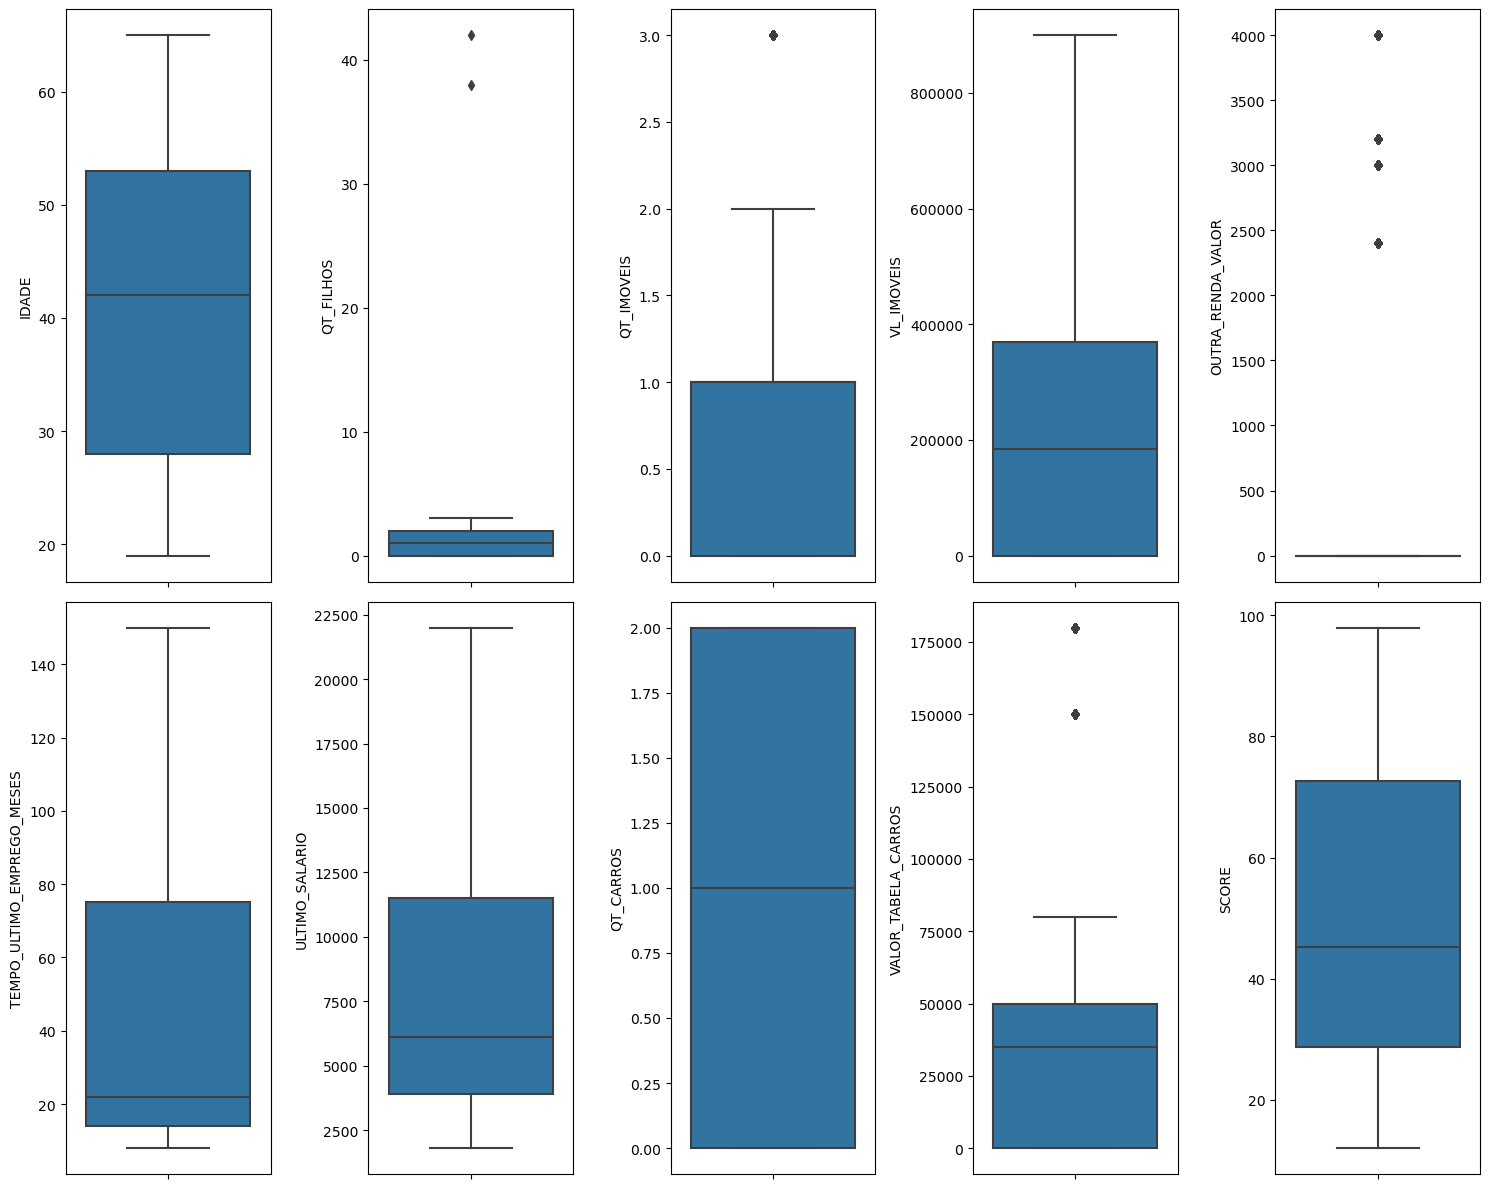

In [17]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

In [18]:
# Agora já sabemos que temos possíveis OUTLIERS nas variáveis QT_FILHOS, QT_IMOVEIS, VALOR_TABELA_CARROS e OUTRA_RENDA_VALOR 
# Vamos olhar quais são esses outliers para avaliar como iremos trata-los.

# Vamos listar a quantidade de filhos superiores a 4
# Como temos somente 2 registros que realmente são outliers então iremos exclui-los
df_dados.loc[df_dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [19]:
# Nesse exemplo vamos excluir o registro todo.
df_dados.drop(df_dados.loc[df_dados['QT_FILHOS'] > 4].index, inplace=True)

In [20]:
# Vamos avaliar as outras variaveis com possíveis outliers

In [21]:
# Não precisamos alterar nada
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [22]:
# Não precisamos alterar nada
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [23]:
# Não precisamos alterar nada
df_dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

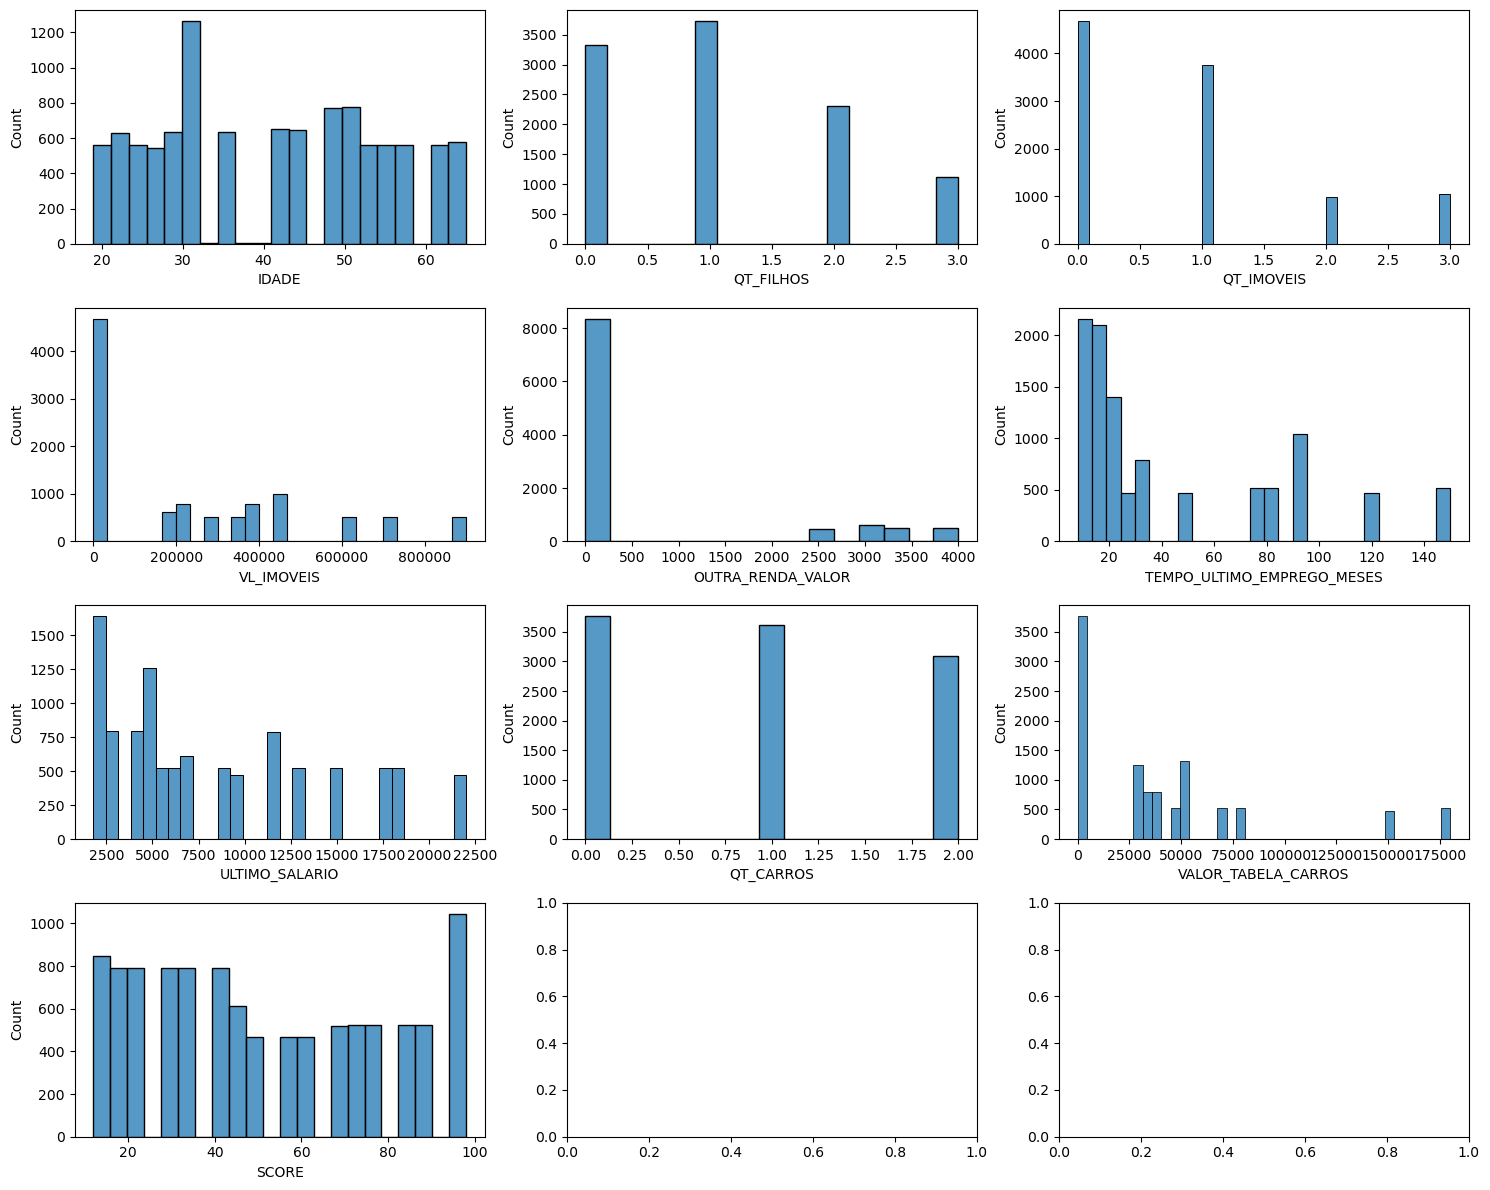

In [24]:
# Vamos gerar um gráfico de histograma para avaliar a distribuição dos dados
# Podemos observar que neste caso os dados estão bem dispersos

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])    
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

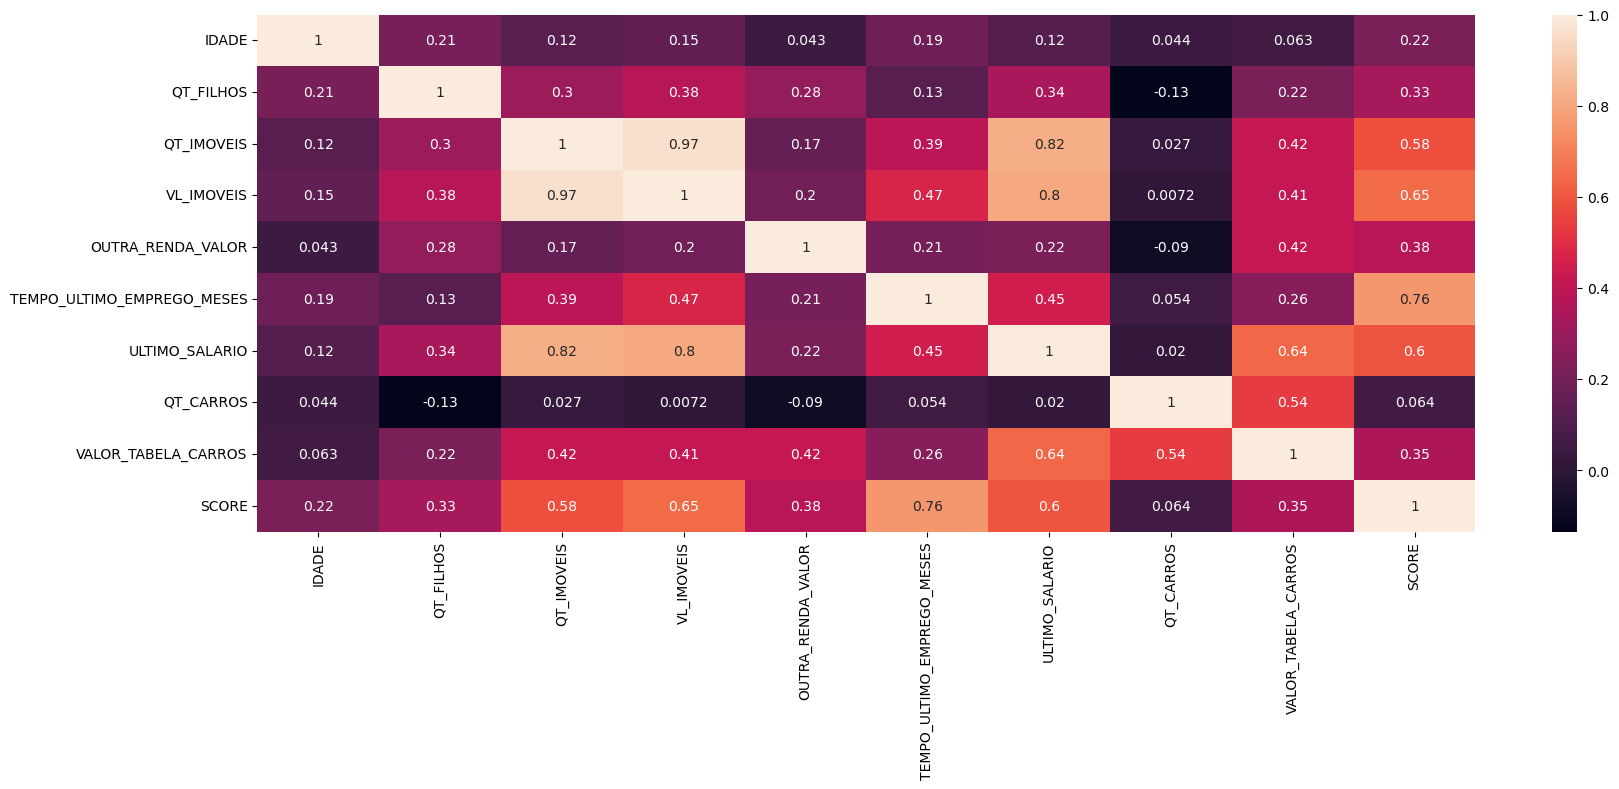

In [25]:
# Através do hitmap podemos observar a correlação entre todas variáveis.
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(df_dados.corr(), annot=True) 

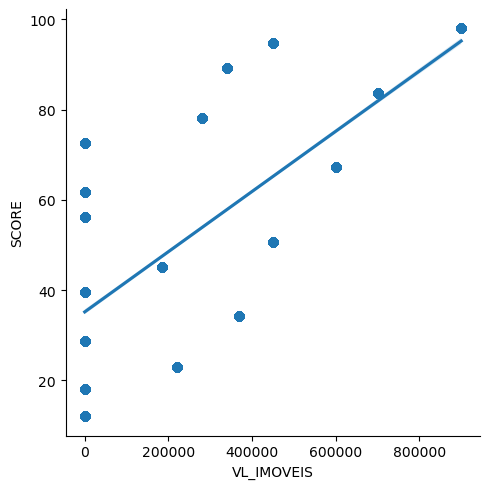

In [26]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = df_dados);

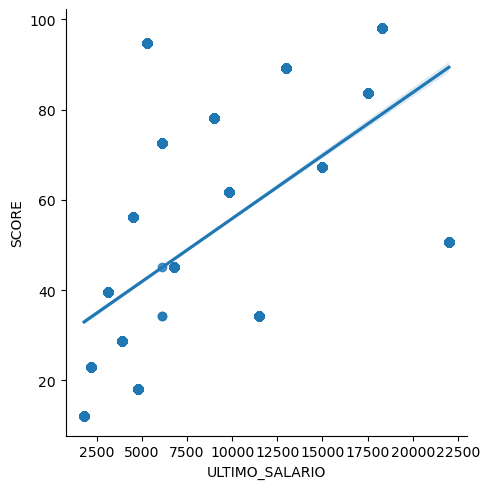

In [27]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = df_dados);

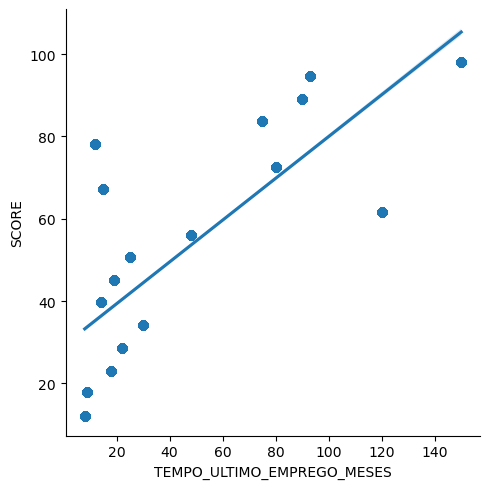

In [28]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = df_dados);

In [29]:
# Vamos fazer uma engenharia de atributos no campo de IDADE e criar um novo campo de Faixa Etaria
print('Menor Idade: ', df_dados['IDADE'].min())
print('Maior Idade: ', df_dados['IDADE'].max())

Menor Idade:  19
Maior Idade:  65


In [30]:
# Engenharia de Atributos - Iremos criar uma nova variável
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

df_dados["FAIXA_ETARIA"] = pd.cut(df_dados["IDADE"], idade_bins, labels=idade_categoria)

df_dados["FAIXA_ETARIA"].value_counts()

Até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: FAIXA_ETARIA, dtype: int64

In [31]:
# Vamos avaliar a média do score pela faixa etaria
df_dados.groupby(["FAIXA_ETARIA"]).mean()["SCORE"]

FAIXA_ETARIA
Até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
Maior que 50    56.123775
Name: SCORE, dtype: float64

In [32]:
variaveis_categoricas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_categoricas.append(i)           

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


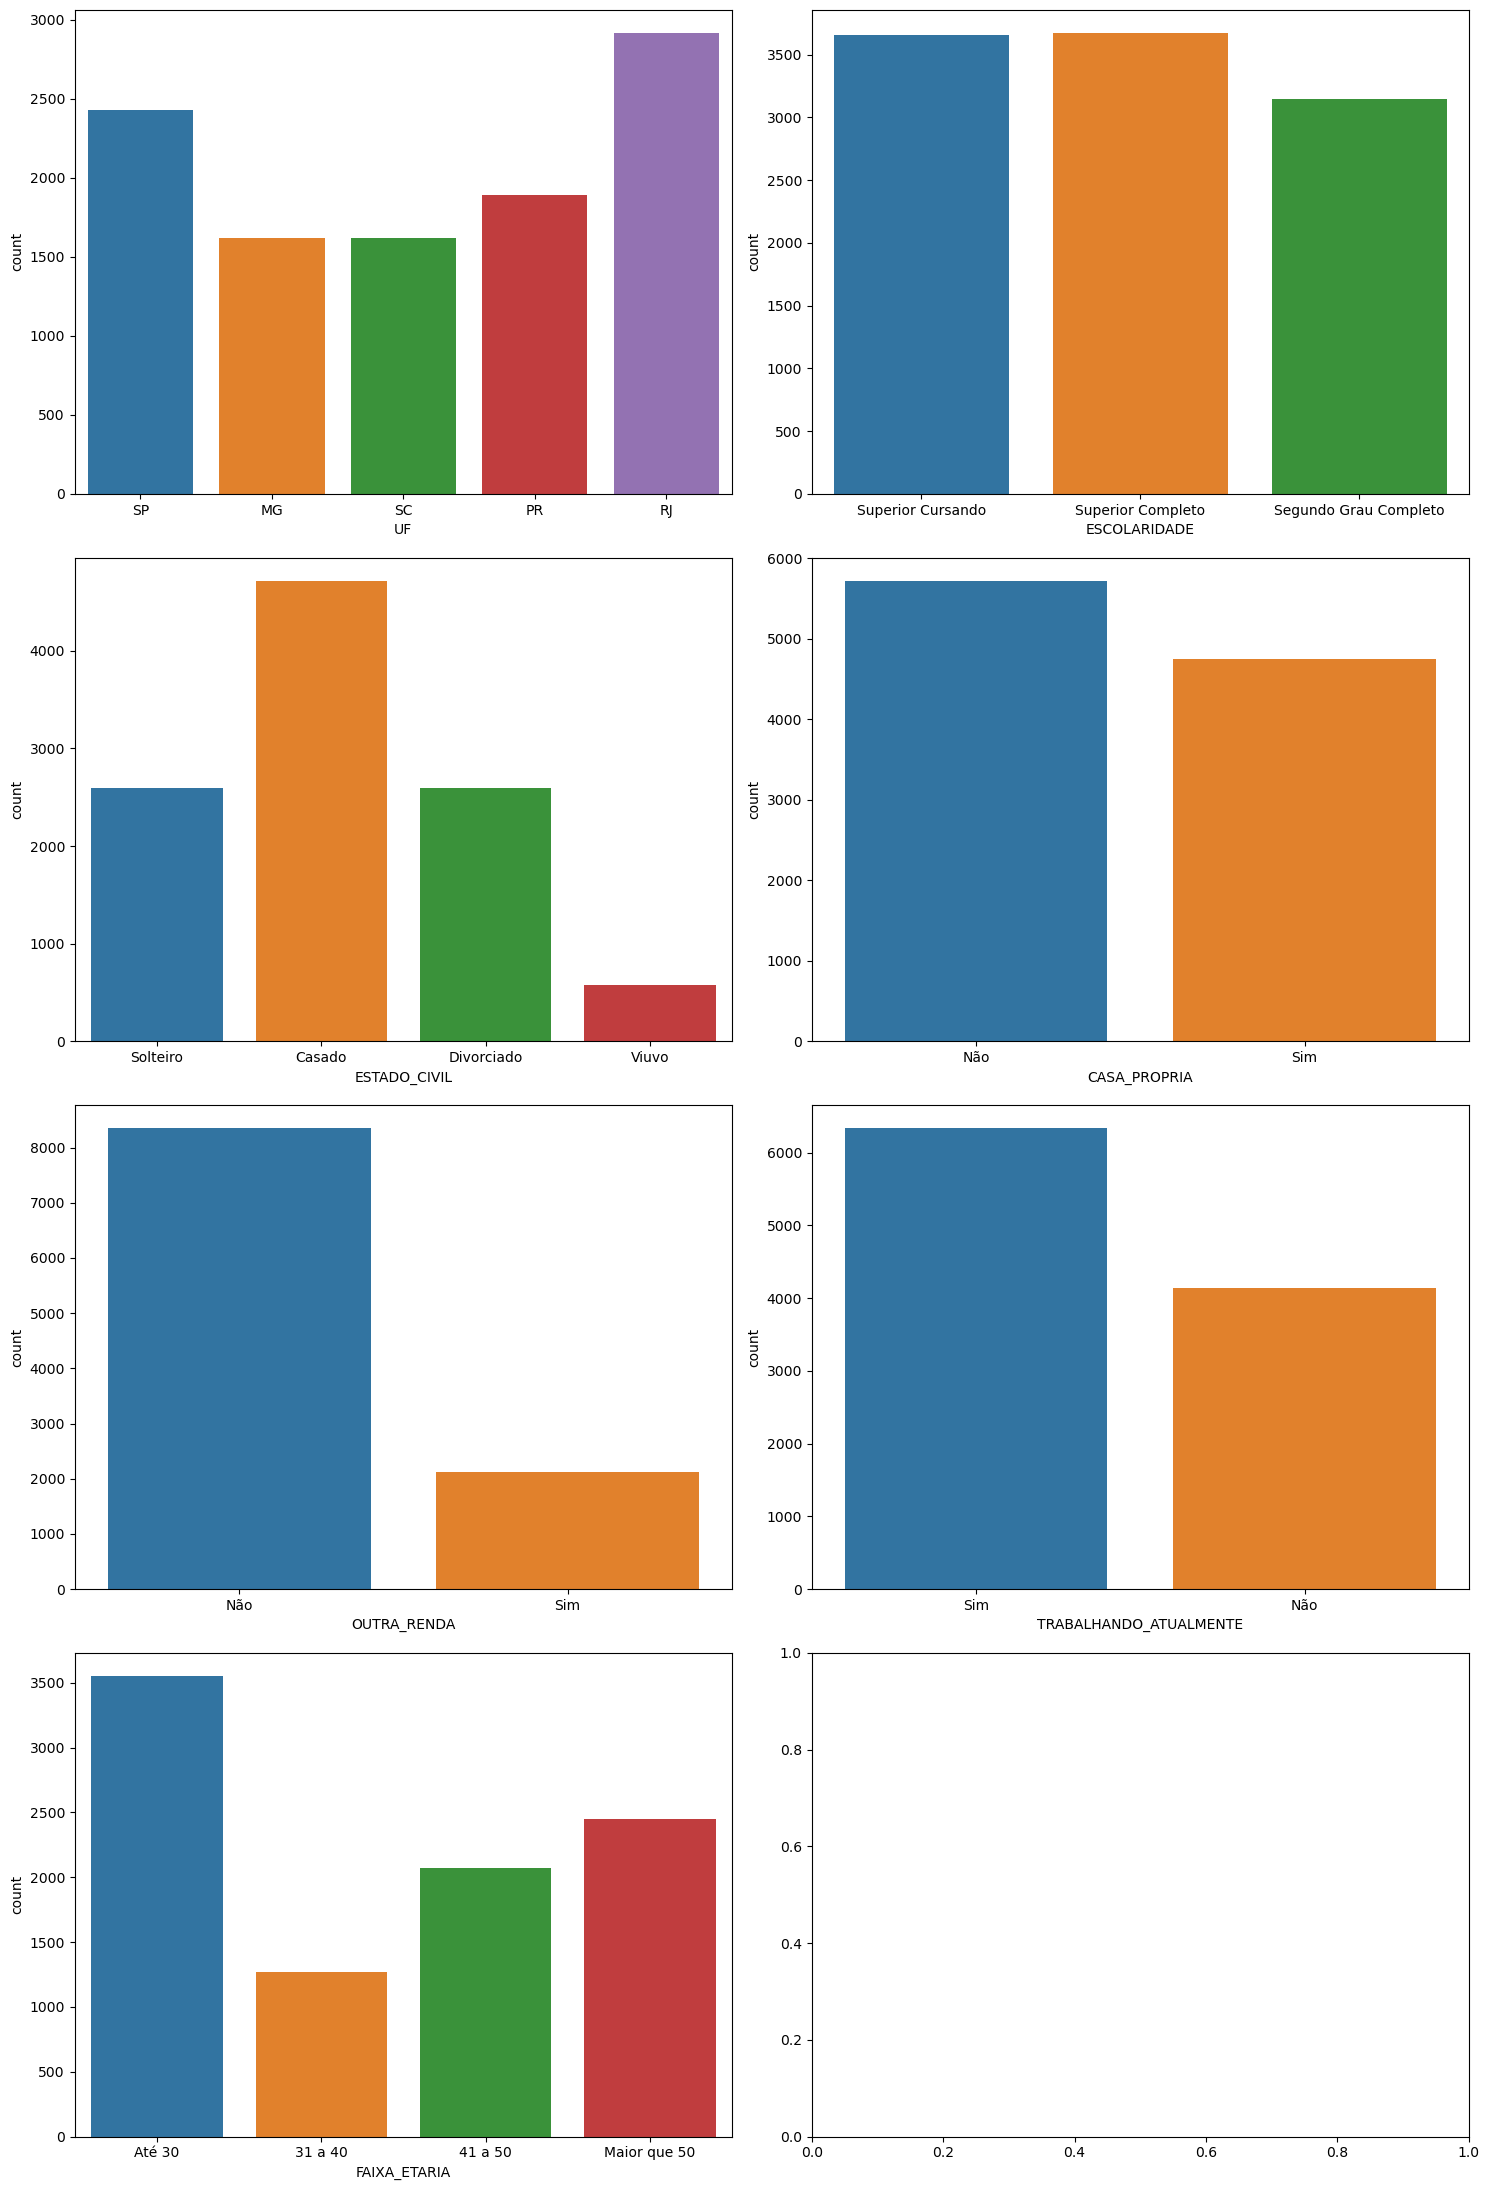

In [33]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:    
    sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

## Pré Processamento dos Dados

In [34]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_dados['FAIXA_ETARIA'] = lb.fit_transform(df_dados['FAIXA_ETARIA'])
df_dados['OUTRA_RENDA'] = lb.fit_transform(df_dados['OUTRA_RENDA'])
df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

# Remove valores missing eventualmente gerados
df_dados.dropna(inplace = True)

In [35]:
df_dados.head(200)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,2
5,4,30,0,1,0,0,0,0,0,0,14,1,3100.0,2,40000,39.666667,2
6,0,32,2,2,1,1,1,185000,1,3000,19,1,6800.0,0,0,45.166667,0
7,3,35,1,2,1,1,2,450000,1,2400,25,1,22000.0,1,150000,50.666667,0
8,1,42,0,0,0,0,0,0,0,0,48,1,4500.0,2,28000,56.166667,1
9,2,45,2,0,0,0,0,0,0,0,120,0,9800.0,0,0,61.666667,1


In [36]:
# Agora podemos observar que já temos todas variaveis numericas
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int32  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int32  
 3   ESTADO_CIVIL                10474 non-null  int32  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int32  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int32  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int32  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   104

In [37]:
# Separando a variavel alvo
target = df_dados.iloc[:,15:16]

In [38]:
# Separando as variaveis preditoras

preditoras = df_dados.copy() #Fazendo uma cópia do dataframe

del preditoras['SCORE'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

preditoras.head()#Visualizando as variaveis preditoras

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [39]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

In [40]:
# Vamos aplicar a normalização em treino e teste
# Padronização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

## Criar, avaliar e testar nosso modelo preditivo 

In [41]:
# Treina o modelo
modelo = LinearRegression(normalize = True, fit_intercept = True)

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [47]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.7984013631162861

In [42]:
UF = 2
IDADE = 42 
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000 
TEMPO_ULTIMO_EMPREGO_MESES = 18 
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 5400.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 70000
FAIXA_ETARIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print("Score de crédito previsto para esse cliente:", modelo.predict(X))

Score de crédito previsto para esse cliente: [[43.18575662]]
